## Example K-means in Python<br>
<br>

**0) Loading Libraries**<br>
<br>

In [1]:
#standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from pyclustering.utils.metric import *                           #for choosing between different metrics
from nltk.cluster.kmeans import KMeansClusterer                   #performs K-means
from sklearn.metrics import silhouette_samples, silhouette_score  #calculating silhouette coefficient
from sklearn import datasets                                      #we want to work with an internal data set

<br>

**1) Loading and Inspecting the Data**<br>
<br>

We want to work with the so-called *iris* data set. Iris are a certain kind of orchids which can be classified based on their blossum leafs: the sepals and petals:
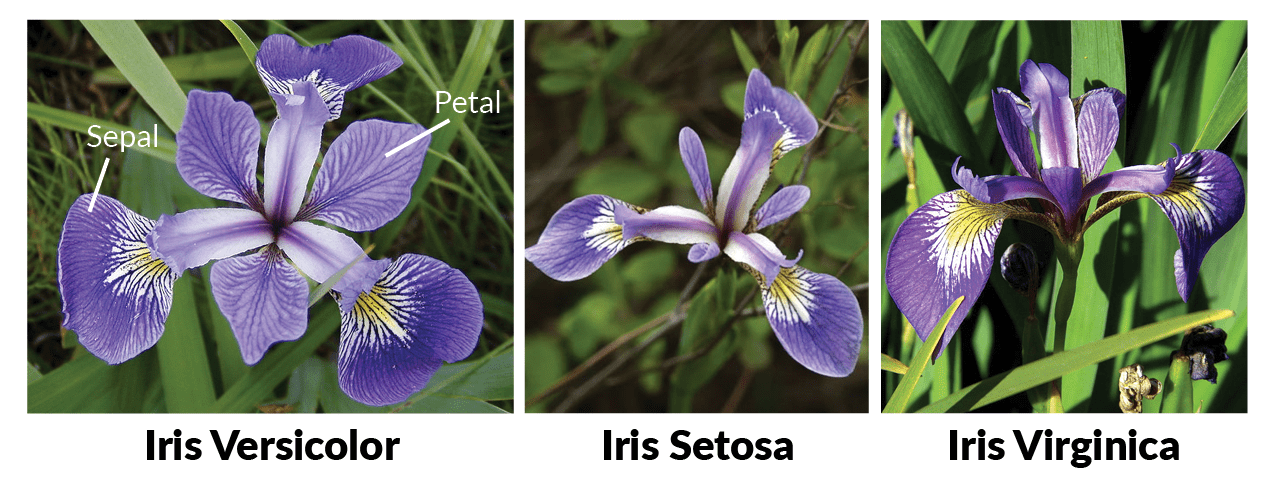

In [5]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
Labels = iris.target_names
print(Labels)
X = iris.data
print(X.shape)

['setosa' 'versicolor' 'virginica']
(150, 4)


In [9]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<br>

**2) Plotting the Data**<br>
<br>

The first 50 entries in the data refer to Setosa, the next 50 entries refer to Versicolour etc. The data set is 4D. For plotting purposes, let's take a look at two dimensions each:

In [11]:
X12 = X[:,0:2]
X23 = X[:,1:3]
X34 = X[:,2:]

Color = ["#1B9E77", "#D95F02", "#7570B3"]

a) first two coordinates:

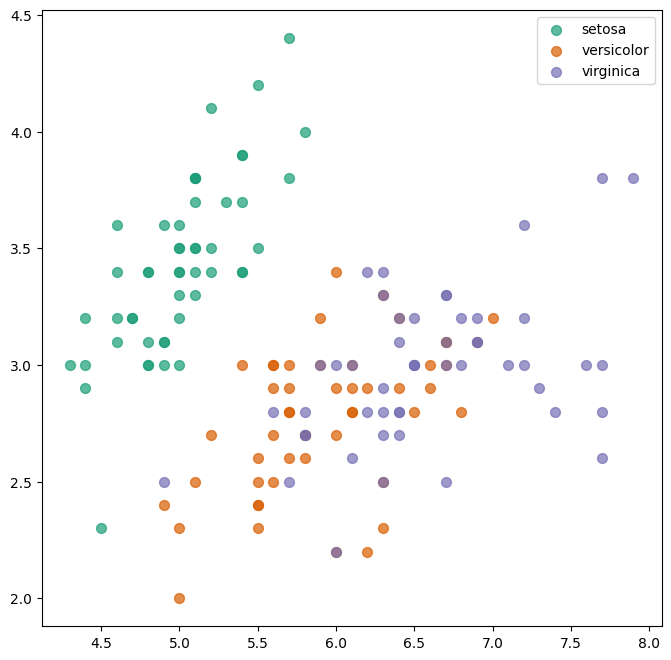

In [13]:
fig, ax = plt.subplots(figsize = (8,8))
i = 0
for species, color in zip(Labels, Color):
    idxs = np.arange(0,50) + 50*i
    i += 1
    ax.scatter(X12[idxs,0], X12[idxs,1], label = species, s = 50, color = color, alpha = 0.7)
ax.legend()
plt.show()

b) second and third coordinate:

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
i = 0
for species, color in zip(Labels, Color):
    idxs = np.arange(0,50) + 50*i
    i += 1
    ax.scatter(X23[idxs,0], X23[idxs,1], label = species, s = 50, color = color, alpha = 0.7)
ax.legend()
plt.show()

c) last two coordinates:

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
i = 0
for species, color in zip(Labels, Color):
    idxs = np.arange(0,50) + 50*i
    i += 1
    ax.scatter(X34[idxs,0], X34[idxs,1], label = species, s = 50, color = color, alpha = 0.7)
ax.legend()
plt.show()

<br>

**3) Running Kmeans**<br>
<br>

a) We start with one of the 2D data sets in order to be able to plot the result

In [15]:
nClust     = 3  #Guessing the number of cluster
rep        = 25 #The initial means are assigned randomly. In order to avoid getting stuck in a local minimum, we repeat the procedure 25 times 
                #and store the best result
dist       = distance_metric(type_metric.EUCLIDEAN) #The features are meassured in cm, i. e. the correct distance to pick here is Euclidean

In [17]:
my_model   = KMeansClusterer(nClust, distance = dist, repeats  = rep)
PredLabels = my_model.cluster(X12, assign_clusters = True)
Center     = my_model.means()    

CenterAr   = np.array(Center)

In [19]:
print(CenterAr)

[[5.00392157 3.40980392]
 [5.8        2.7       ]
 [6.82391304 3.07826087]]


The labels are assigned 0, 1, 2 since we don't know the true labels (unsupervised learning!)

In [21]:
print(PredLabels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1]


Let us plot the centers (means) and compare their location to the data:

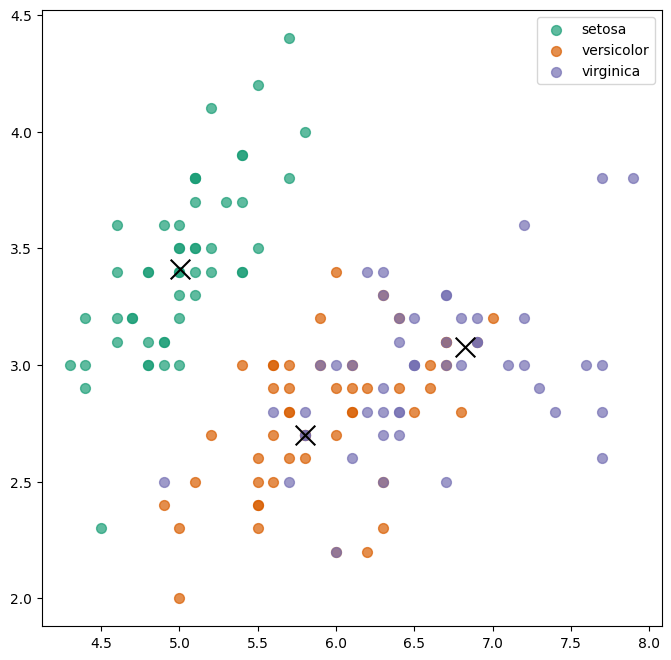

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
i = 0
for species, color in zip(Labels, Color):
    idxs = np.arange(0,50) + 50*i
    i += 1
    ax.scatter(X12[idxs,0], X12[idxs,1], label = species, \
               s = 50, color = color, alpha = 0.7)
ax.legend()
ax.scatter(CenterAr[:,0],CenterAr[:,1], marker = 'x', s = 200, color = 'k')
plt.show()

Now our model is ready to go and we can predict the class of a new, unknown data point:

In [33]:
data_new  = [6.3,2.7]
data_new  = [5,3.5]

In [35]:
data_new_PredLabel = my_model.classify(data_new) #predicting the label
print(data_new_PredLabel)

0


Label  = 0 corresponds to:

In [38]:
print(Labels[data_new_PredLabel])

setosa


What is the probability, that the new data point does indeed belong to cluster Labelpred = 0? 

In [40]:
Probs = my_model.likelihood(data_new, data_new_PredLabel)
print(Probs)

1.0


Let us now create the same scatterplot as above, but now assigning the labes according to the predicted labels:

In [42]:
PredLabels = np.array(PredLabels)

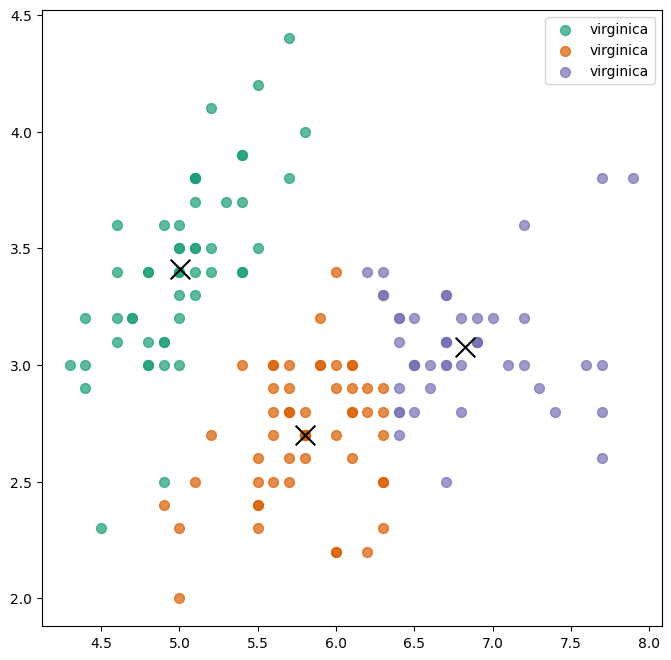

In [44]:
fig, ax = plt.subplots(figsize=(8,8))
for species_pred, color in zip(np.unique(PredLabels), Color):
    idxs = np.where(np.array(PredLabels) == species_pred)
    ax.scatter(X12[idxs,0], X12[idxs,1], label = species, \
               s = 50, color = color, alpha = 0.7)
ax.legend()
ax.scatter(CenterAr[:,0],CenterAr[:,1], marker = 'x', s = 200, color = 'k')
plt.show()

Some data points have been labeled differently. Again, keep in mind, that we **don't know the individual labels in practice** (unsupervised learning)!<br>
Often, we don't know the number of clusters too. Let us create a density plot in order to get an impression of how the data appears to us if we didn't know the number of clusters:

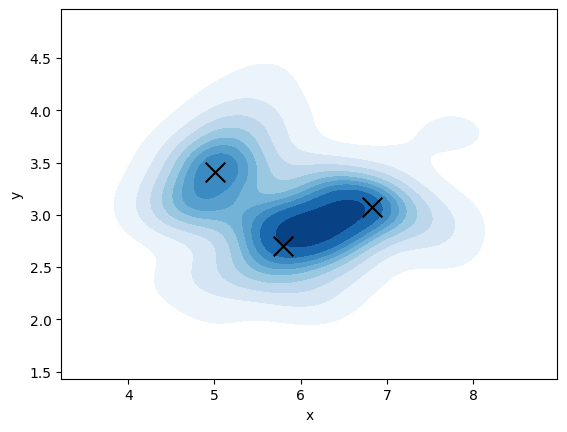

In [46]:
ax = sns.kdeplot(data = pd.DataFrame(X12, columns = ['x', 'y']), x = 'x', y = 'y', cmap = 'Blues', fill=True)
ax.scatter(CenterAr[:,0],CenterAr[:,1], marker = 'x', s = 200, color = 'k')
plt.show()

It actually looks like two clusters!

b) Analyzing the 4D dataset

Let us now take all features into account and run the 4D dataset. We also want to calculate the silhouette coefficient for different numbers of clusters and find the best value.

In [48]:
Kmax = 15                 #calculate the silhouette coefficient for 2, 3, ... 15 cluster
S    = np.zeros((Kmax-1)) #preparing matrix for storing the result

In [50]:
for k in range(2, Kmax + 1):
    my_model = KMeansClusterer(k, distance = dist, repeats = 25, avoid_empty_clusters = True)
    Labels   = my_model.cluster(X, assign_clusters = True)
    S[k-2]   = silhouette_score(X, Labels)#calculating the silhouette coefficient (1st entry for k=2, but index = 0)

Plotting the silhouette coefficient depending on the number of clusters

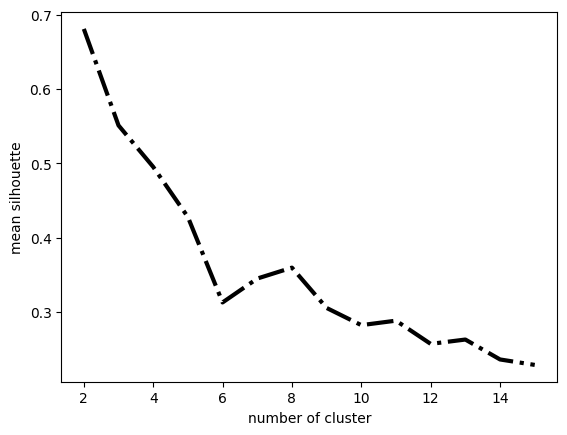

In [52]:
plt.plot(np.arange(2, Kmax + 1), S, c = 'k', linestyle = '-.', linewidth = 3)
plt.xlabel('number of cluster')
plt.ylabel('mean silhouette')
plt.show()

We obtain the best values for k = 2, not for k = 3!

Let us run the model for k = 3 and calculate the accuracy:

In [54]:
my_model = KMeansClusterer(3, distance = dist, repeats = 25, avoid_empty_clusters = True)
Labels   = my_model.cluster(X, assign_clusters = True)

In [56]:
Labels   = np.array(Labels)

diff0 = Labels[:50]    - 0
diff1 = Labels[50:100] - 1
diff2 = Labels[100:]   - 2

diff    = np.vstack((diff0, diff1, diff2))
idx     = np.array(np.where(diff==0))
_, col  = idx.shape
accur   = col/150
print(f'accuracy is :{accur:.3f}%')

accuracy is :0.887%


Almost 90%